###### this notebook outlines the process of creating a dataset and then uploading using a tested pre-existing dataset on huggingface.
###### the purpose of this is to fine-tune a pre-trained model on a custom dataset.
###### the dataset used here is : https://huggingface.co/datasets/vkenbeek/verilog-wavedrom

###### downloading the dataset

In [50]:
import os;

from IPython.display import display;

from datasets import load_dataset;

In [51]:
ds = load_dataset("vkenbeek/verilog-wavedrom")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:01<?, ?it/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

###### now that we have the dataset, we can slice it to get a small dataset with 1 row to test on

In [52]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 73834
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 18458
    })
})


In [53]:
train = ds["train"][:10];
test = ds["test"][:10]

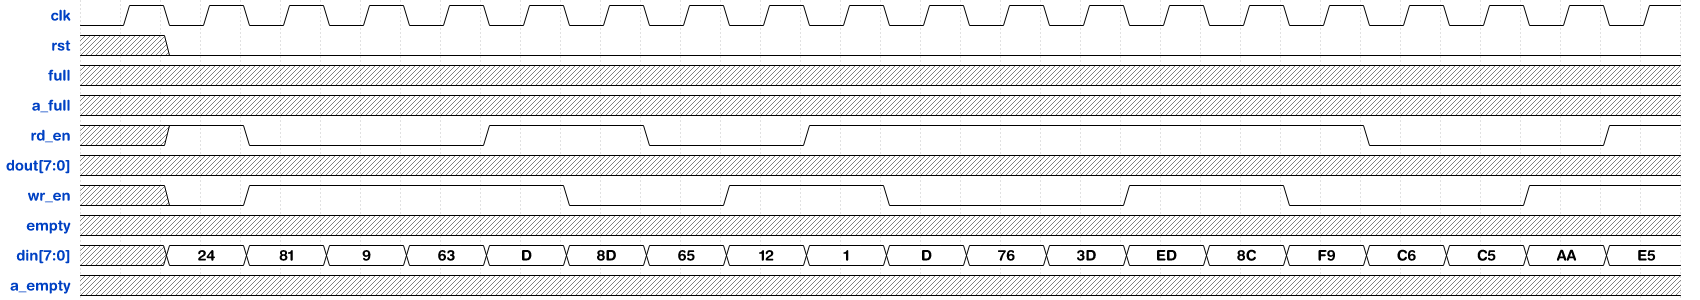

In [54]:
# display PngImageFile
display( train["image"][0] );

In [55]:
print( train["text"][0] );

module axi_protocol_converter_v2_1_b2s_simple_fifo #
(
  parameter C_WIDTH  = 8,
  parameter C_AWIDTH = 4,
  parameter C_DEPTH  = 16
)
(
  input  wire               clk,       // Main System Clock  (Sync FIFO)
  input  wire               rst,       // FIFO Counter Reset (Clk
  input  wire               wr_en,     // FIFO Write Enable  (Clk)
  input  wire               rd_en,     // FIFO Read Enable   (Clk)
  input  wire [C_WIDTH-1:0] din,       // FIFO Data Input    (Clk)
  output wire [C_WIDTH-1:0] dout,      // FIFO Data Output   (Clk)
  output wire               a_full,
  output wire               full,      // FIFO FULL Status   (Clk)
  output wire               a_empty,
  output wire               empty      // FIFO EMPTY Status  (Clk)
);

///////////////////////////////////////
// FIFO Local Parameters
///////////////////////////////////////
localparam [C_AWIDTH-1:0] C_EMPTY = ~(0);
localparam [C_AWIDTH-1:0] C_EMPTY_PRE =  (0);
localparam [C_AWIDTH-1:0] C_FULL  = C_EMPTY-1;
local

In [56]:
# create a directory to store verilog + image pairs. Each pair should have their own folder named with the row from the dataset that they came from.

def _create_dir( path ):
    if not os.path.exists( path ):
        os.makedirs( path );

def _save_image( image, path ):
    image.save( path );

def _save_verilog( text, path ):
    with open( path, "w" ) as f:
        f.write( text );

def save_dataset( dataset, path ):
 
    for i in range( len( dataset['text'] ) ):
        
        image = dataset["image"][i];
        text = dataset["text"][i];
        # use the row number as the file name
        row = str( i );
        # row number is the file name
        img_filename = path + "/" + row + ".png";
        verilog_filename = path + "/" + row + ".v";
        # check if file exists already 
        if os.path.exists( img_filename ) and os.path.exists( verilog_filename ):
            print( "Files already exists" );
            continue;
        else:
            _save_image( image, path +"/" + row + ".png" );
            _save_verilog( text, path + "/" + row + ".v" );

In [57]:
_create_dir( "train" );
save_dataset( train, "train" );

In [58]:
_create_dir( "test" );
save_dataset( test, "test" );